<a href="https://colab.research.google.com/github/MoonlightO2/Simple-Diabetes-Prediction-System/blob/main/Diabetes_Data_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diabetes Data Analysis and Prediction**
**Dataset Source**: https://www.kaggle.com/datasets/saurabh00007/diabetescsv

**Dataset Path**: /content/drive/MyDrive/2. Projects/Colab Notebooks/Portfolio/Healthcare/healthcare_dataset.csv

***Pregnancies***: Number of times pregnant

***Glucose***: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

***BloodPressure***: Diastolic blood pressure (mm Hg)

***SkinThickness***: Triceps skin fold thickness (mm)

***Insulin***: 2-Hour serum insulin (mu U/ml)

***BMI***: Body mass index (weight in kg/(height in m)^2)

***DiabetesPedigreeFunction***: Diabetes pedigree function

***Age***: Age (years)

***Outcome***: Class variable (0 or 1)

In [84]:
diabetes_data_path = '/content/drive/MyDrive/2. Projects/Colab Notebooks/Portfolio/Diabetes Data Analysis and Prediction/diabetes.csv'

In [85]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [86]:
# Step 1: Data Collection
data = pd.read_csv(diabetes_data_path)
print('Shape: ', data.shape)
data.head()

Shape:  (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [87]:
data.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [88]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [89]:
# Assuming df is your DataFrame
unique_values = data.nunique()
print("Number of unique values in each column:")
print(unique_values)

# If you want to see unique values for each column
for column in data.columns:
    unique_vals = data[column].unique()
    print(f"\nUnique values in '{column}' column: {unique_vals}")

Number of unique values in each column:
Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

Unique values in 'Pregnancies' column: [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]

Unique values in 'Glucose' column: [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 19

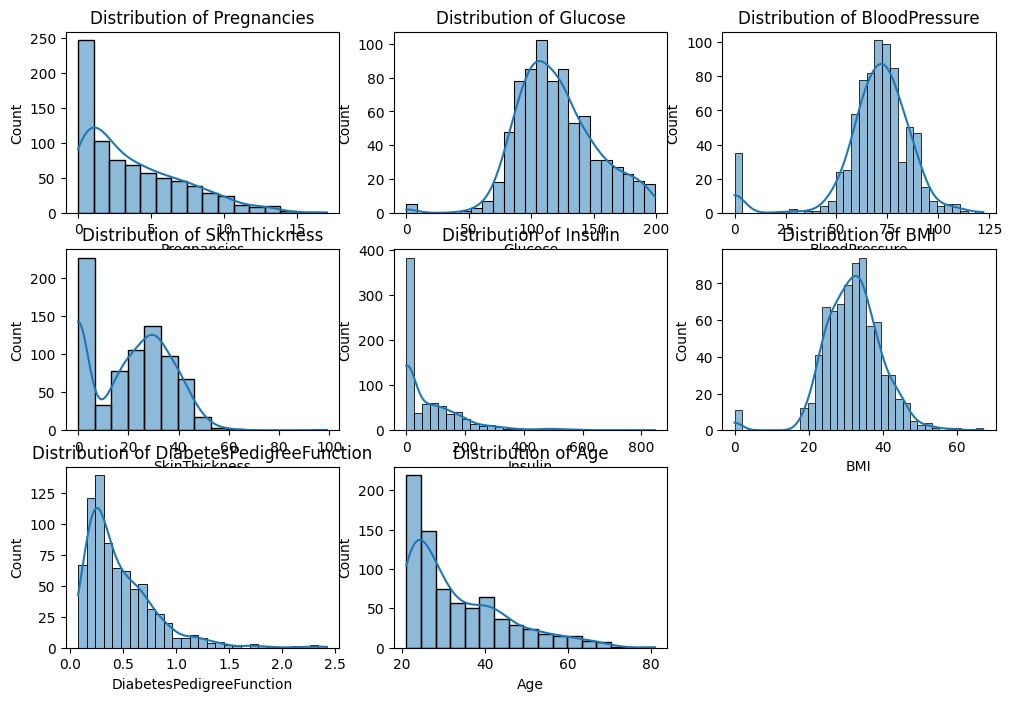

In [90]:
# Assuming df is your DataFrame
plt.figure(figsize=(12, 8))

# Histograms
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')

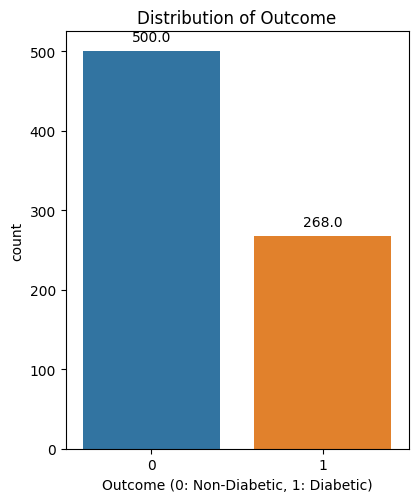

In [91]:
# Assuming df is your DataFrame
plt.figure(figsize=(12, 14))

# Categorical plots for Outcome
plt.subplot(3, 3, 9)
sns.countplot(x='Outcome', data=data)

# Annotate the count values on the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Outcome')
plt.xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)')

plt.tight_layout()
plt.show()

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming data  is your DataFrame
# X contains the features, and y contains the target variable (Outcome)
X = data .drop('Outcome', axis=1)
y = data ['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.7207792207792207

Confusion Matrix:
 [[77 22]
 [21 34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [93]:
# Get input from the user
name = input("Enter your name: ")
date_of_birth_str = input("Enter your date of birth (YYYY-MM-DD): ")

# Convert the date of birth string to a datetime object
date_of_birth = datetime.strptime(date_of_birth_str, "%Y-%m-%d")

# Calculate age
current_date = datetime.now()
age = current_date.year - date_of_birth.year - ((current_date.month, current_date.day) < (date_of_birth.month, date_of_birth.day))

# Feature names used during training
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Ask the user to input values
user_input_values = [float(input(f"{feature}: ")) for feature in feature_names[:-1]]  # Exclude 'Age' from user input

# Add calculated age to the user input values
user_input_values.append(age)

# Create a DataFrame with the user input
user_data = pd.DataFrame([user_input_values], columns=feature_names)

# Make predictions for the user input
prediction = model.predict(user_data)

# Display the prediction
if prediction[0] == 0:
    print("\nYou are not a Diabetic")
elif prediction[0] == 1:
    print("\nYou are a Diabetic")
else:
    print("\nPrediction not clear")

Enter your name: Shashini Peiris
Enter your date of birth (YYYY-MM-DD): 1982-11-29
Pregnancies: 0
Glucose: 119
BloodPressure: 96
SkinThickness: 23
Insulin: 79
BMI: 24
DiabetesPedigreeFunction: 0.5

You are not a Diabetic
